In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from seaborn_qqplot import pplot
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from statsmodels.stats.outliers_influence import variance_inflation_factor

file = pd.read_csv("marketing_customer_analysis.csv")
file.columns = file.columns.str.lower().str.replace(" ","_")
file.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
# Get the numeric data.
numdata = file.select_dtypes(np.number)
display(numdata)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


# Check normality

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

### Visual check for normality

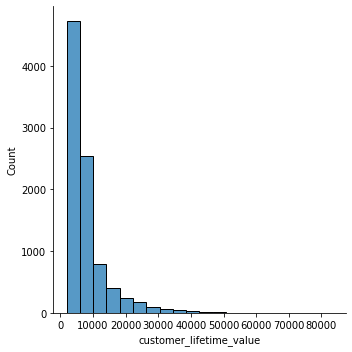

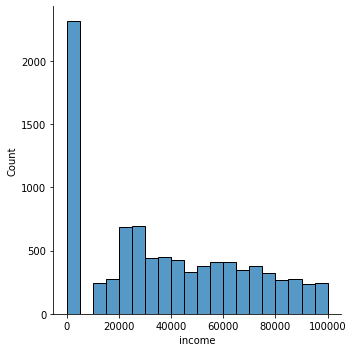

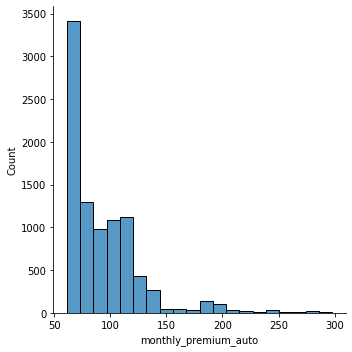

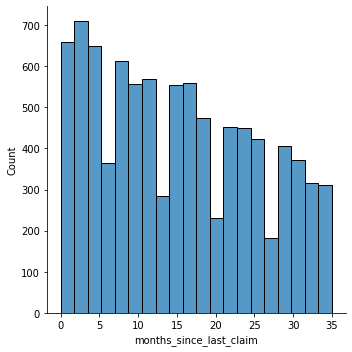

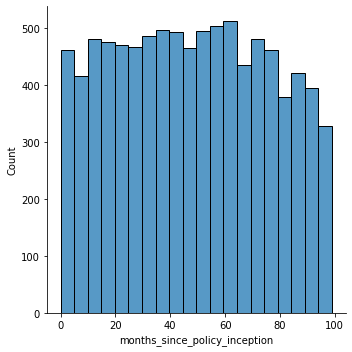

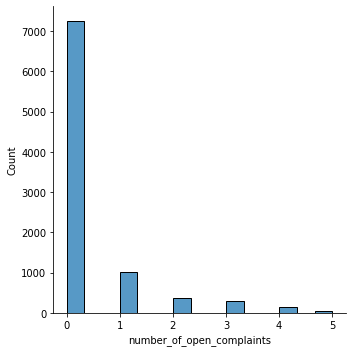

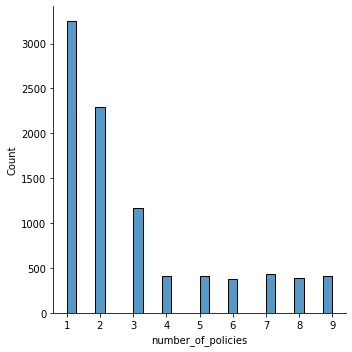

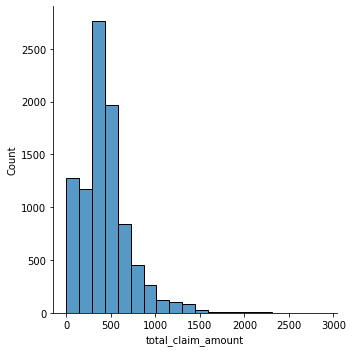

In [3]:
# Show histograms for all colums
sns.displot(file, x="customer_lifetime_value", bins=20)
sns.displot(file, x="income", bins=20)
sns.displot(file, x="monthly_premium_auto", bins=20)
sns.displot(file, x="months_since_last_claim", bins=20)
sns.displot(file, x="months_since_policy_inception", bins=20)
sns.displot(file, x="number_of_open_complaints")
sns.displot(file, x="number_of_policies")
sns.displot(file, x="total_claim_amount", bins=20)
plt.show()

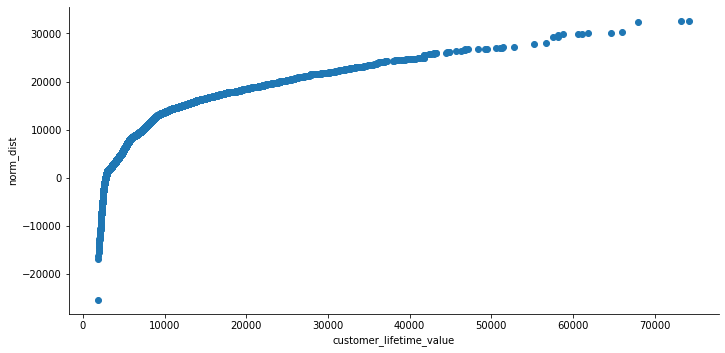

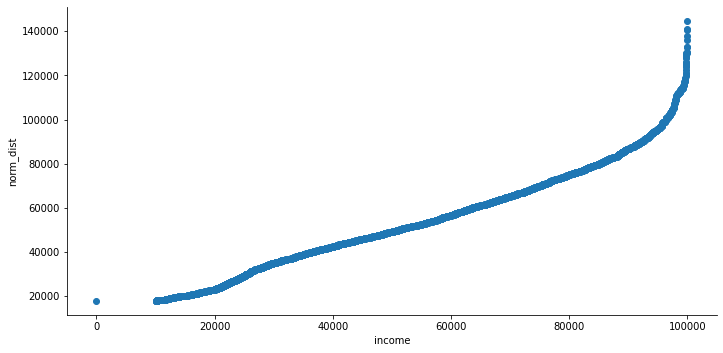

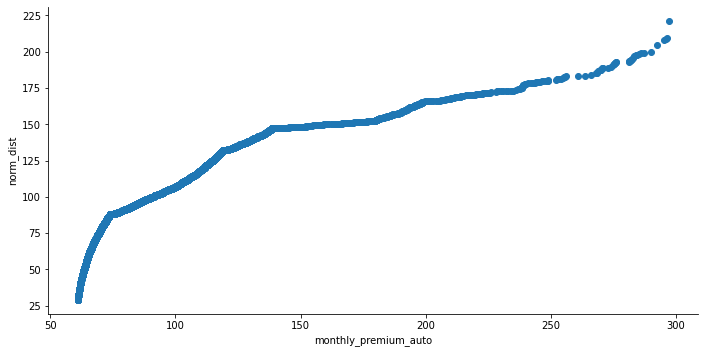

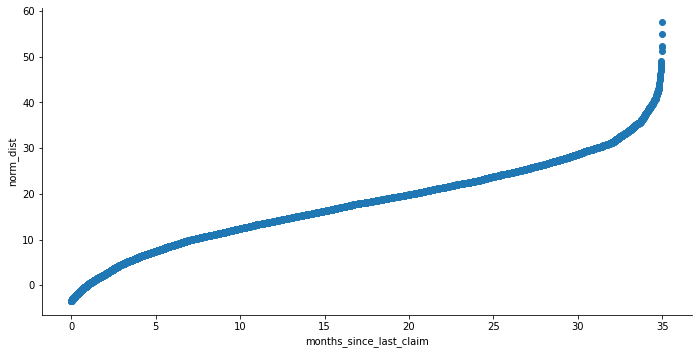

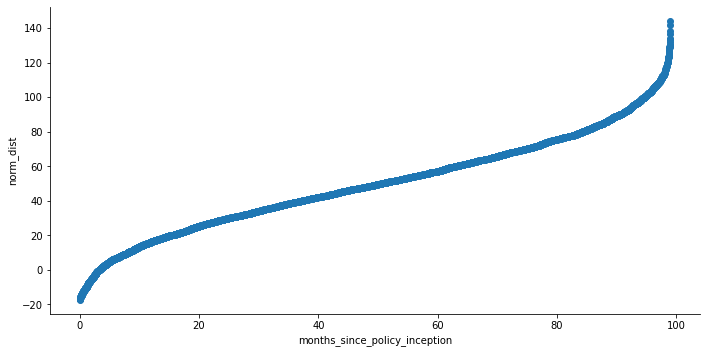

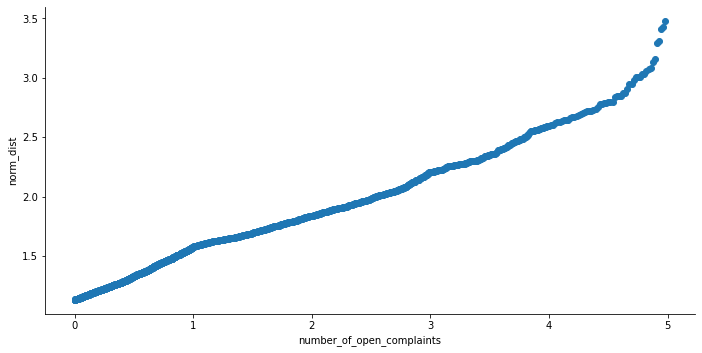

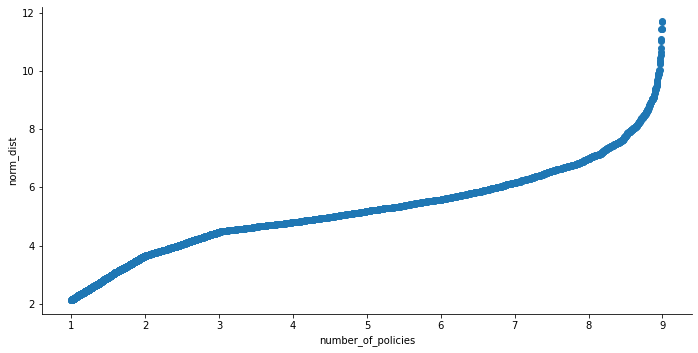

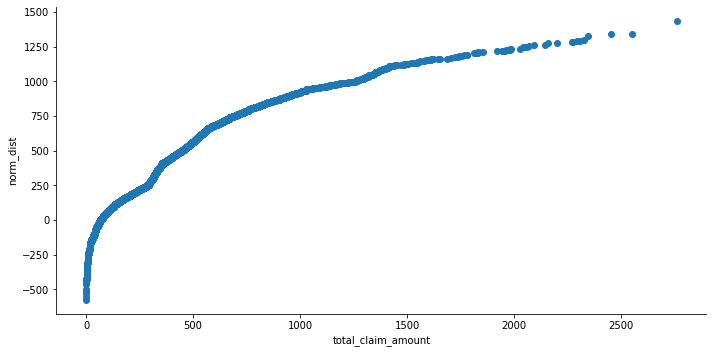

In [4]:
# Show qq plots against Gaussian distribution fro all columns
pplot(file, x="customer_lifetime_value", y=norm, kind ="qq", height=5, aspect=2)
pplot(file, x="income", y=norm, kind ="qq", height=5, aspect=2)
pplot(file, x="monthly_premium_auto", y=norm, kind ="qq", height=5, aspect=2)
pplot(file, x="months_since_last_claim", y=norm, kind ="qq", height=5, aspect=2)
pplot(file, x="months_since_policy_inception", y=norm, kind ="qq", height=5, aspect=2)
pplot(file, x="number_of_open_complaints", y=norm, kind ="qq", height=5, aspect=2)
pplot(file, x="number_of_policies", y=norm, kind ="qq", height=5, aspect=2)
pplot(file, x="total_claim_amount", y=norm, kind ="qq", height=5, aspect=2)

plt.show()

### Shapiro-Wilk Test

In [5]:
clmn = list(numdata) 
seed(173563746)
alpha = 0.05

for i in clmn:
    stat, p = shapiro(numdata[i])
    print('statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('%s looks Gaussian (fail to reject H0)' % (i))
    else:
        print('%s does not look Gaussian (reject H0)' % (i))


statistics=0.703, p=0.000
customer_lifetime_value does not look Gaussian (reject H0)
statistics=0.922, p=0.000
income does not look Gaussian (reject H0)
statistics=0.789, p=0.000
monthly_premium_auto does not look Gaussian (reject H0)
statistics=0.950, p=0.000
months_since_last_claim does not look Gaussian (reject H0)
statistics=0.961, p=0.000
months_since_policy_inception does not look Gaussian (reject H0)
statistics=0.487, p=0.000
number_of_open_complaints does not look Gaussian (reject H0)
statistics=0.780, p=0.000
number_of_policies does not look Gaussian (reject H0)
statistics=0.888, p=0.000
total_claim_amount does not look Gaussian (reject H0)


/home/annast/.local/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### D'Agostino and Pearson's Test

In [6]:
clmn = list(numdata) 
seed(273363746)
alpha = 0.05

for i in clmn:
    stat, p = normaltest(numdata[i])
    print('statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('%s looks Gaussian (fail to reject H0)' % (i))
    else:
        print('%s does not look Gaussian (reject H0)' % (i))


statistics=6056.611, p=0.000
customer_lifetime_value does not look Gaussian (reject H0)
statistics=3720.270, p=0.000
income does not look Gaussian (reject H0)
statistics=4064.718, p=0.000
monthly_premium_auto does not look Gaussian (reject H0)
statistics=3281.472, p=0.000
months_since_last_claim does not look Gaussian (reject H0)
statistics=4660.446, p=0.000
months_since_policy_inception does not look Gaussian (reject H0)
statistics=5201.269, p=0.000
number_of_open_complaints does not look Gaussian (reject H0)
statistics=1535.744, p=0.000
number_of_policies does not look Gaussian (reject H0)
statistics=3401.598, p=0.000
total_claim_amount does not look Gaussian (reject H0)


### Anderson-Darling Test

In [7]:
clmn = list(numdata) 
seed(273363746)
alpha = 0.05

for i in clmn:
    result = anderson(numdata[i])
    print('%s statistic: %.3f' % (i, result.statistic))
    p = 0
    for j in range(len(result.critical_values)):
        sl, cv = result.significance_level[j], result.critical_values[j]
        if result.statistic < result.critical_values[j]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    print()


customer_lifetime_value statistic: 708.664
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)

income statistic: 196.317
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)

monthly_premium_auto statistic: 453.668
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)

months_since_last_claim statistic: 118.019
15.000: 0.576, data does not look normal (reject H0)
10.000

# Check multicollinearity

https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [9]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(numdata)

,variables,VIF
0,customer_lifetime_value,2.806978
1,income,2.831329
2,monthly_premium_auto,14.130566
3,months_since_last_claim,2.784766
4,months_since_policy_inception,3.267760
5,number_of_open_complaints,1.166620
6,number_of_policies,2.299313
7,total_claim_amount,6.666879


__monthly_premium_auto__ and __total_claim_amount__ have a high(bigger than 5) VIF value, meaning they can be predicted by other independent variables in the dataset.

In [12]:
calc_vif(numdata.drop(['monthly_premium_auto'],axis=1))

,variables,VIF
0,customer_lifetime_value,2.464493
1,income,2.238585
2,months_since_last_claim,2.687899
3,months_since_policy_inception,3.092350
4,number_of_open_complaints,1.163372
5,number_of_policies,2.265310
6,total_claim_amount,3.002417


In [11]:
calc_vif(numdata.drop(['total_claim_amount'],axis=1))

,variables,VIF
0,customer_lifetime_value,2.805772
1,income,2.278732
2,monthly_premium_auto,6.363674
3,months_since_last_claim,2.782622
4,months_since_policy_inception,3.265764
5,number_of_open_complaints,1.166609
6,number_of_policies,2.297052


Removing __monthly_premium_auto__ column drastically reduces VIF value for all columns while removing __total_claim_amount__ column does not reduce VIF value below 5 for __monthly_premium_auto__ column
